In [39]:
     
class prepro():
    def __init__(self, data):
        self.data=data
    
    def info(self):
        import pandas as pd 
        from pandas import Series, DataFrame
        
        print(self.data.head())
        
        print("DATA INFORMATION:")
        print(self.data.info())
        
        print("DATA DESCRIPTION:")
        print(self.data.describe())
        
        print("NULL VALUES:")
        print(self.data.isnull().sum(axis = 0))
    
class inf_stats():
    def __init__(self, data):
        self.data=data
    
    
        
    def corr(self):
        import seaborn as sns
        import matplotlib.pyplot as plt
        
        
        fig,ax = plt.subplots(figsize=(7, 7))
        sns.heatmap(self.data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
        plt.show()

    def norm_test(self, column):
        import pylab
        import scipy.stats as stats
        from scipy.stats import shapiro
        
        print("H0: Data normally distributed\n")
        #H1=Data dağılımı Normal dağılım değildir.
        
        #shapiro kullanıyoruz
        
        
        
        stat, p= shapiro(self.data[column])
        print("Statistic= {} , p-val={}".format( stat, p))
        
        #Test istatistiğini ve p-value'yu elde ettik.alpha değerimizi 0.05 kabul ettiğimizi var sayalım.
        if p>0.01:
            print("H0-> Fail to Reject. Data is normally distributed.")
        else:
            print("H0-> Reject. Data is not normally distributed.")
        
        #Probability plot çizdirerek, görselleştirme de yapıyoruz.
        stats.probplot(self.data[column],dist='norm',plot=pylab)
        pylab.show()
        
    def t_test(self, popmean, column):
        import scipy.stats as stats 
        import statsmodels.stats.api as sms
        
        #one- sample t-test 
        self.column=column
        self.popmean=popmean
        print("Hypothesis:\nH0:μ0={}\n".format(self.popmean))
        
        #calculation of p-value and statistic
        stat, pval=stats.ttest_1samp(self.data[self.column],popmean=self.popmean)
        print('RESULT=\nStatistics=%.3f,p-value=%.3f' % (stat,pval))
        
        #confidence interval
        cf=sms.DescrStatsW(self.data[self.column]).tconfint_mean()
        print("Confidence Interval={}\n".format(cf))
        
        if pval<0.05:
            print("Reject H0 --> μ0≠{}". format(self.popmean))
        else:
            print("Fail to reject H0 --> μ0={}". format(self.popmean))
     
    def two_samp(self,cl1,cl2):
        import pandas as pd 
        import numpy as np 
        import scipy.stats as stats
        from scipy.stats import shapiro
        
        
        self.cl1=self.data[cl1]
        self.cl2=self.data[cl2]
        
        c1_c2=pd.concat([self.cl1,self.cl2], axis=1)
        
        #test the sample 1 is normally distributed
        stat1, p1=shapiro(c1_c2[cl1])
        print("Statistic1= {} , p-val1={}".format( stat1, p1))
        
        if p1<0.05:
            print("'{}' is not normally distributed".format(cl1))
        else:
            print("'{}' is normally distributed\n".format(cl1))
            
        #test the sample 2 is normally distributed   
        stat2, p2=shapiro(c1_c2[cl2])  
        print("Statistic2= {} , p-val2={}".format( stat2, p2))
        if p1<0.05:
            print("'{}' is not normally distributed\n".format(cl2))
        else:
            print("'{}' is normally distributed\n".format(cl2))
        
        
        print("    ******KS TEST******   ")
        print("HİPOTEZ:")
        print("H0:'{}' and '{}' have same distribution\n".format(cl1,cl2))
        import scipy
        
        stat, p=scipy.stats.ks_2samp(c1_c2[cl1],c1_c2[cl2])
        print("Statistic= {}, p-val={}".format(stat,p))
        if p<0.05:
            print("H0--> Reject. They have different distribution\n")
        else:
            print("H0--> Fail to Reject.\n")
        
        import scipy.stats as stats
        
        print("VARIANCE:")
        print("HİPOTEZ:")
        print("H0:'{}' and '{}' have same variance\n".format(cl1,cl2))
        
        stat, p=stats.levene(c1_c2[cl1],c1_c2[cl2])
        print("Statistic= {}, p-val={}".format(stat,p))
        if p<0.05:
            print("H0--> Reject. They have different variance\n")
        else:
            print("H0--> Fail to Reject.")
            
        if p<0.05:
            equal_var=False
        else:
            equal_var=True
        print("MEAN:")
        stat, p=stats.ttest_ind(c1_c2[cl1],c1_c2[cl2])
        print("Statistic= {}, p-val={}".format(stat,p))
        if p<0.05:
            print("H0--> Reject. They have different mean\n")
        else:
            print("H0--> Fail to Reject.")
    
    
    def box_2samp(self,cl1,cl2):
        import matplotlib.pyplot as plt
        figg=plt.figure(figsize=(8,8))
        sns.boxplot(x=data[cl1],y=data[cl2])

class visualize:
    def __init__(self, data):
        self.data=data
    
    def hist_all(self,column):
        import matplotlib.pyplot as plt
        self.column=column
        for col in self.column:
            fig=self.data[col].plot.hist()
            fig.set_title(col)
            plt.show()

        
        

class model():
    pass
class supervised(model): #inheritance
    def regression():
        pass
    def classification():
        pass
class unsupervised(model):
    def clustering():
        pass

In [36]:
import pandas as pd
from pandas import Series, DataFrame
dat=pd.read_csv("hmelq.csv")
data=dat.copy()
data=data.dropna()


# Veri Bilgisi

In [31]:
data0=prepro(data)
data0.info()

     bad   loan   mortdue     value   reason  job   yoj  derog  delinq  \
153    0  18200   94727.0  136877.0  DebtCon  Mgr  15.0    0.0     0.0   
154    0  21700   79240.0   96784.0  DebtCon  Mgr   5.0    0.0     0.0   
155    0  34100  241931.0   36486.0  DebtCon  Mgr   1.0    0.0     2.0   
156    0   8400   62989.0   76718.0  HomeImp  Mgr   3.0    0.0     2.0   
157    0  17400   25859.0   43684.0  DebtCon  Mgr  16.0    1.0     0.0   

      clage  ninq  clno  debtinc  
153  168.96   2.0  26.0   36.056  
154   64.51   6.0  24.0   38.079  
155  196.01   3.0  50.0   42.459  
156  131.47   0.0  22.0   29.200  
157   95.36   1.0  17.0   27.108  
DATA INFORMATION:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      2018 non-null   int64  
 1   loan     2018 non-null   int64  
 2   mortdue  2018 non-null   float64
 3   value    2018 non-null 

## Kategorik Verileri görselleştirme

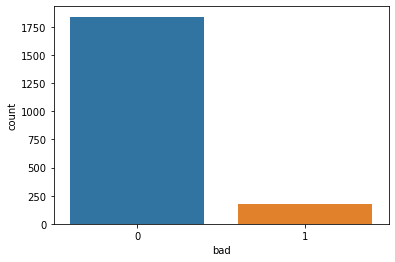

In [47]:
import seaborn as sns
sns.countplot("bad", data=data)

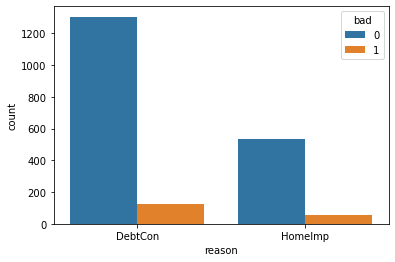

In [44]:
sns.countplot("reason", hue="bad", data=data)

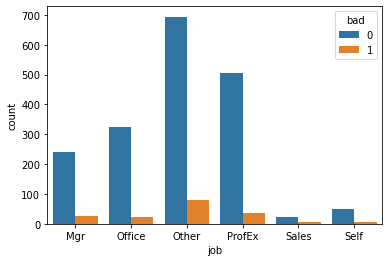

In [7]:
sns.countplot("job", hue="bad", data=data)

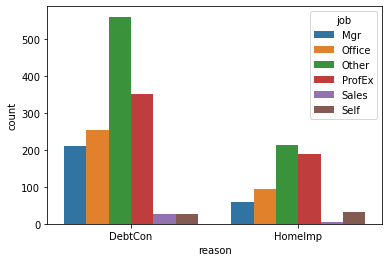

In [45]:
sns.countplot("reason", hue="job", data=data)

In [26]:
pd.crosstab(data["bad"], data["job"],normalize='index')

job,Mgr,Office,Other,ProfEx,Sales,Self
bad,,,,,,
0,0.131522,0.177174,0.377174,0.273913,0.012500,0.027717
1,0.151685,0.123596,0.449438,0.196629,0.039326,0.039326


In [32]:
pd.crosstab(data["bad"], data["reason"],normalize='index').style.background_gradient(cmap="Oranges")

reason,DebtCon,HomeImp
bad,,
0,0.708696,0.291304
1,0.696629,0.303371


## Nümerik Verileri Görselleştirme

Verilerin histogramı çizilmiştir.

In [40]:
data1=visualize(data)

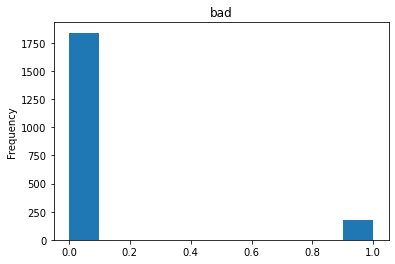

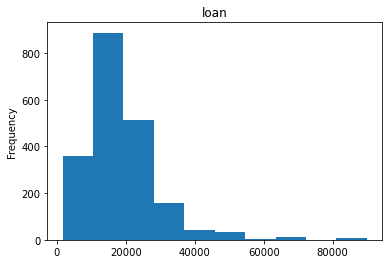

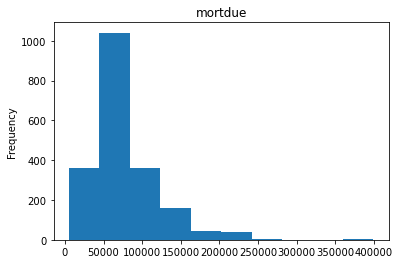

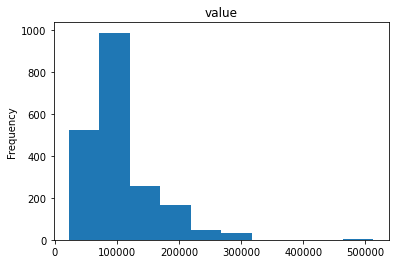

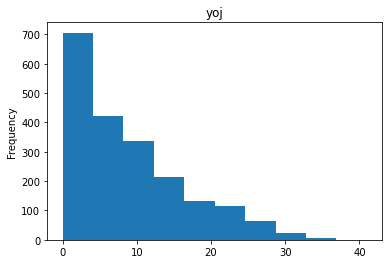

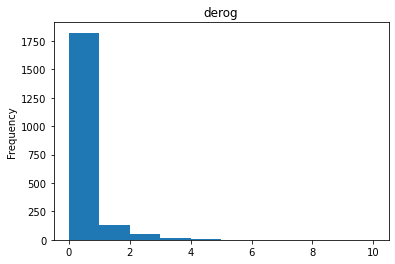

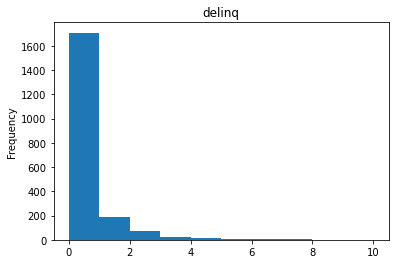

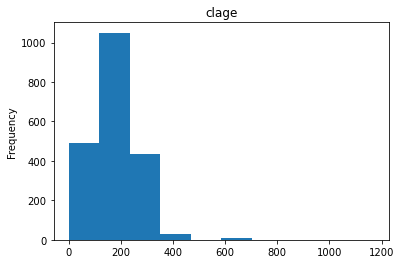

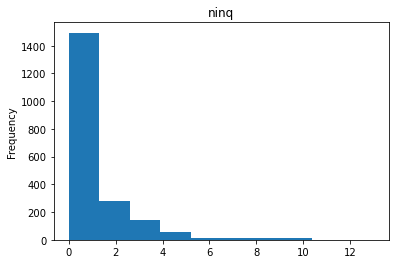

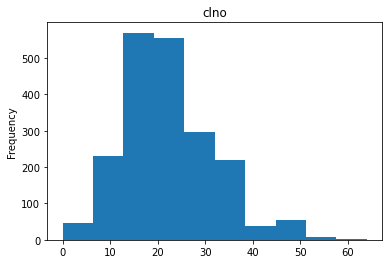

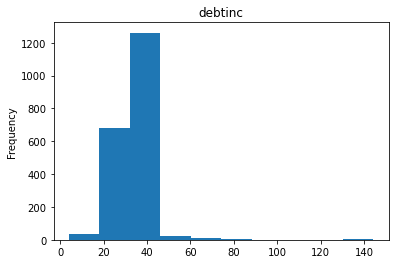

In [43]:
data1.hist_all(["bad","loan","mortdue","value","yoj","derog","delinq","clage","ninq","clno","debtinc"])

### Korelasyon 

In [16]:
data1=inf_stats(data)

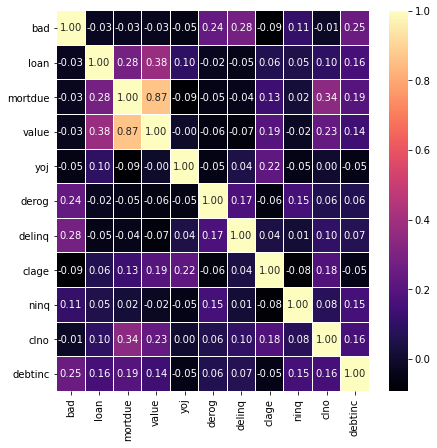

In [17]:
data1.corr()

In [ ]:
Korelasyon testi sonucunda value-mortdue ve value-loan arasında pozitif ilişki çıkmıştır.

## Numerik Verilerin Normallik Testi

LOAN
H0: Data normally distributed

Statistic= 0.8360166549682617 , p-val=1.9721874586907475e-41
H0-> Reject. Data is not normally distributed.


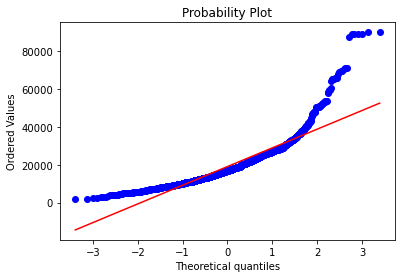

None
MORTDUE
H0: Data normally distributed

Statistic= 0.8624268174171448 , p-val=7.460412130575895e-39
H0-> Reject. Data is not normally distributed.


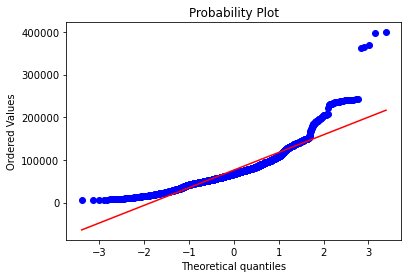

None
VALUE
H0: Data normally distributed

Statistic= 0.8436811566352844 , p-val=1.0142738414629458e-40
H0-> Reject. Data is not normally distributed.


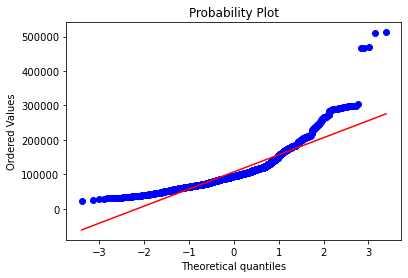

None
YOJ
H0: Data normally distributed

Statistic= 0.9115960597991943 , p-val=9.607595978546815e-33
H0-> Reject. Data is not normally distributed.


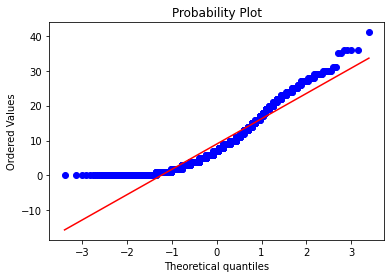

None
DEROG
H0: Data normally distributed

Statistic= 0.2769438624382019 , p-val=0.0
H0-> Reject. Data is not normally distributed.


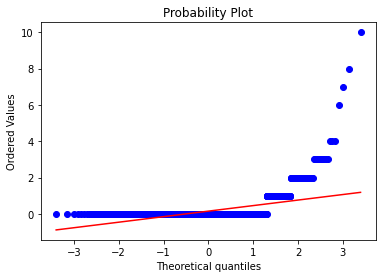

None
DELINQ
H0: Data normally distributed

Statistic= 0.3798753023147583 , p-val=0.0
H0-> Reject. Data is not normally distributed.


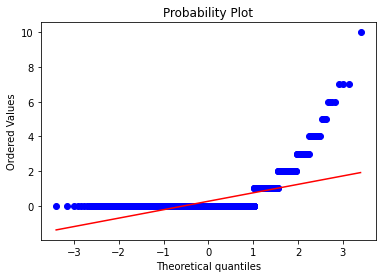

None
CLAGE
H0: Data normally distributed

Statistic= 0.9051468372344971 , p-val=1.112704769060138e-33
H0-> Reject. Data is not normally distributed.


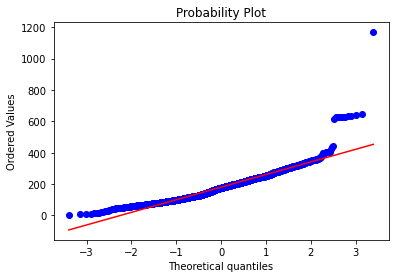

None
NINQ
H0: Data normally distributed

Statistic= 0.6690858602523804 , p-val=0.0
H0-> Reject. Data is not normally distributed.


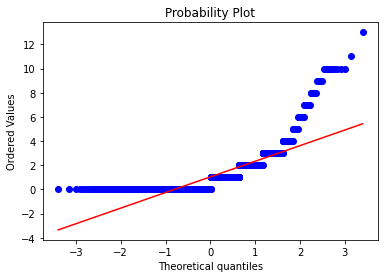

None
CLNO
H0: Data normally distributed

Statistic= 0.964141309261322 , p-val=5.696766726335972e-22
H0-> Reject. Data is not normally distributed.


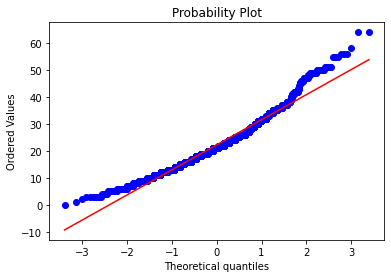

None
DEBTINC
H0: Data normally distributed

Statistic= 0.8244601488113403 , p-val=1.8707334498736308e-42
H0-> Reject. Data is not normally distributed.


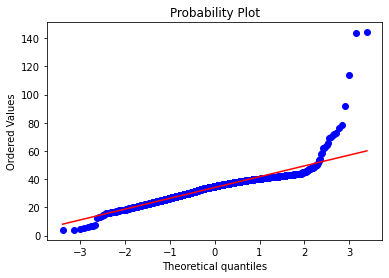

None


In [43]:
for col in ["loan","mortdue","value","yoj","derog","delinq","clage","ninq","clno","debtinc"]:
    print(col.upper())
    print(data1.norm_test(col))

### 2 Örneklem t-testi

In [40]:
data1.two_samp("value","mortdue")

Statistic1= 0.8436811566352844 , p-val1=1.0142738414629458e-40
'value' is not normally distributed
Statistic2= 0.8624268174171448 , p-val2=7.460412130575895e-39
'mortdue' is not normally distributed

    ******KS TEST******   
HİPOTEZ:
H0:'value' and 'mortdue' have same distribution

Statistic= 0.3260654112983152, p-val=2.6393712994024788e-95
H0--> Reject. They have different distribution

VARIANCE:
HİPOTEZ:
H0:'value' and 'mortdue' have same variance

Statistic= 27.166309046206063, p-val=1.960277648170479e-07
H0--> Reject. They have different variance

MEAN:
Statistic= 19.619089210061393, p-val=6.26319951433942e-82
H0--> Reject. They have different mean



In [42]:
data1.two_samp("value","loan")

Statistic1= 0.8436811566352844 , p-val1=1.0142738414629458e-40
'value' is not normally distributed
Statistic2= 0.8360166549682617 , p-val2=1.9721874586907475e-41
'loan' is not normally distributed

    ******KS TEST******   
HİPOTEZ:
H0:'value' and 'loan' have same distribution

Statistic= 0.9365708622398414, p-val=0.0
H0--> Reject. They have different distribution

VARIANCE:
HİPOTEZ:
H0:'value' and 'loan' have same variance

Statistic= 949.7865923817392, p-val=1.7801999732710778e-187
H0--> Reject. They have different variance

MEAN:
Statistic= 71.66821194502124, p-val=0.0
H0--> Reject. They have different mean



### Kategorik-Numeric Verileri Görselleştirme

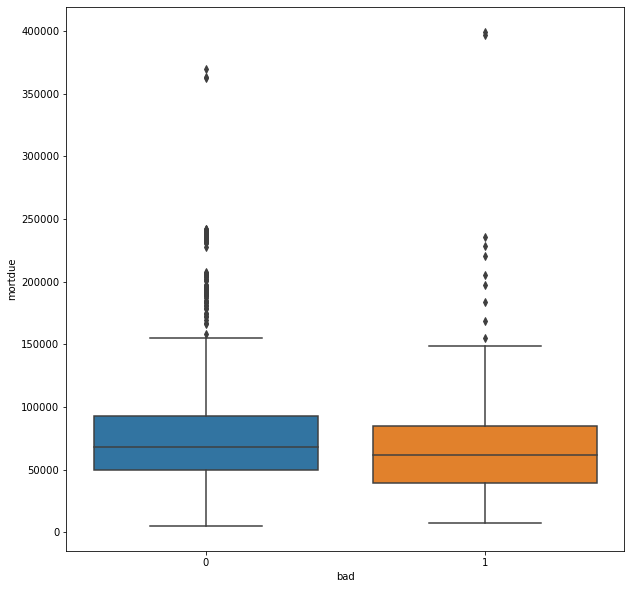

In [125]:
data2.box_2samp("bad","mortdue")

In [45]:
data2=inf_stats(data)

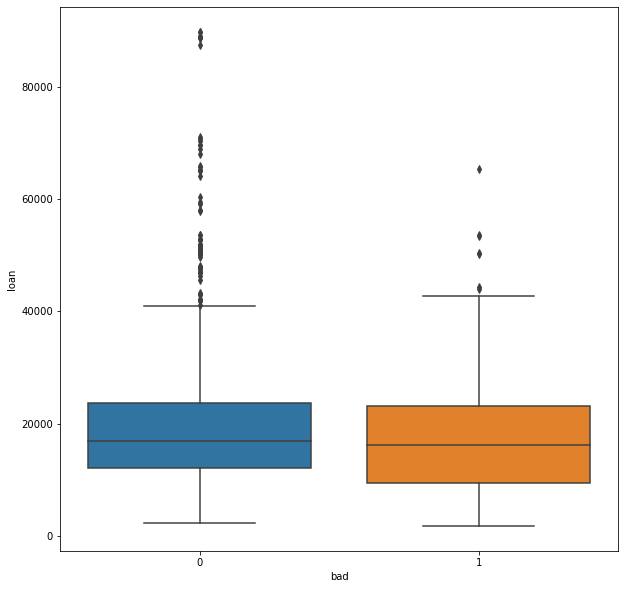

In [107]:
data2.box_2samp("bad","loan")

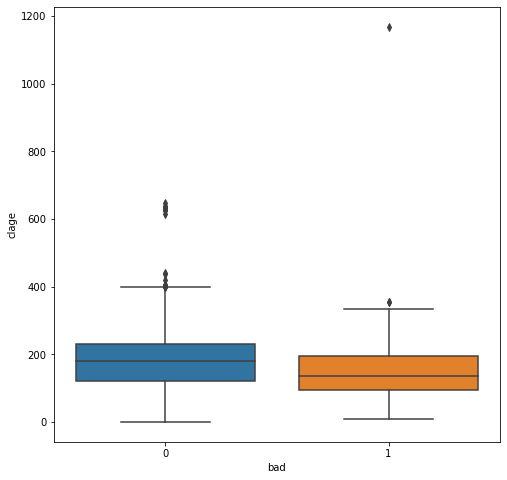

In [48]:
data2.box_2samp("bad","clage")

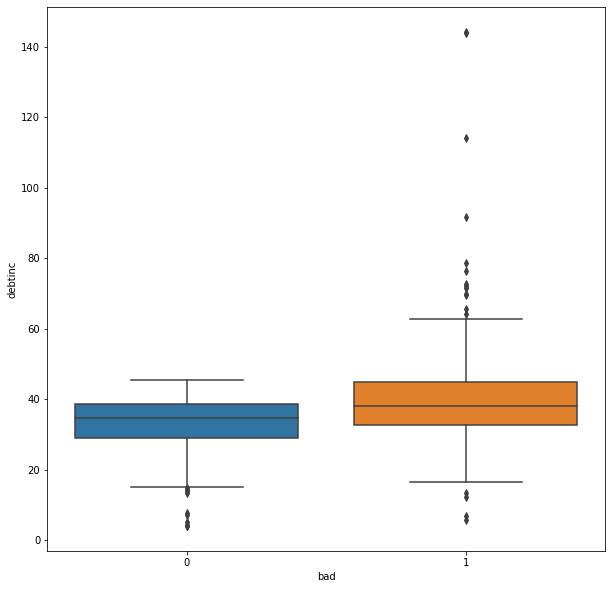

In [109]:
data2.box_2samp("bad","debtinc")